In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_blobs, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
# Construct dataset
X, Y = make_gaussian_quantiles(n_samples=100, n_features=2, n_classes = 2)
df = pd.DataFrame(dict(X1=X[:,0], X2=X[:,1], Y=Y))
df

,X1,X2,Y
0,-0.243345,-0.945800,0
1,-0.728999,0.001573,0
2,0.729673,-1.231441,1
3,0.853143,0.667585,0
4,1.735371,-1.572946,1
...,...,...,...
95,1.520737,1.005900,1
96,1.353256,-0.500554,1
97,1.802953,0.310906,1
98,-0.385463,-0.657596,0


1    50
0    50
Name: Y, dtype: int64


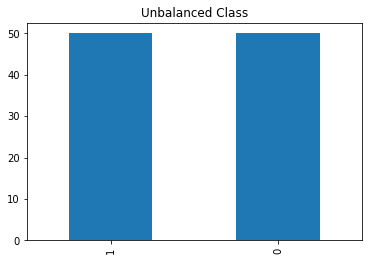

In [2]:
print(df['Y'].value_counts())
a = df['Y'].value_counts().plot(kind='bar', title='Unbalanced Class')
plt.show(a)

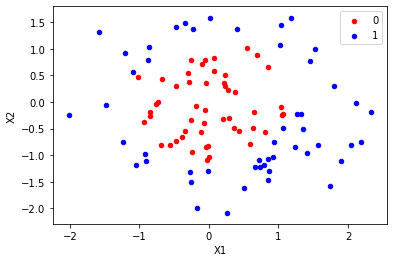

In [3]:
from matplotlib import pyplot
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('Y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X1', y='X2', label=key, color=colors[key])
pyplot.show()

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [5]:
clf = svm.SVC()
kernel = ['linear', 'poly', 'rbf']
from sklearn.model_selection import GridSearchCV
params_grid = {'kernel' : ['linear', 'poly', 'rbf']}
s = GridSearchCV(clf, params_grid)
s.fit(X_train, Y_train)
print(s.best_params_)

{'kernel': 'rbf'}


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Testing Misclassified samples : 7
Testing Accuracy: 0.7666666666666667
Training Misclassified samples : 23
Training Accuracy: 0.6714285714285714



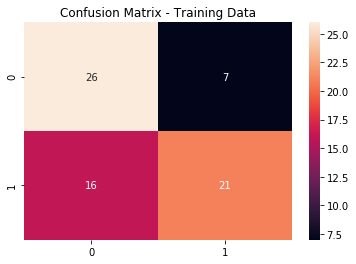

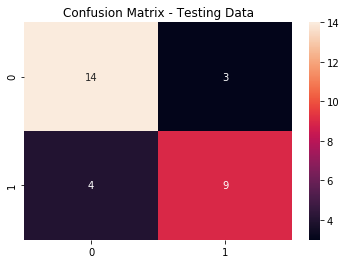

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Testing Misclassified samples : 5
Testing Accuracy: 0.8333333333333334
Training Misclassified samples : 19
Training Accuracy: 0.7285714285714285



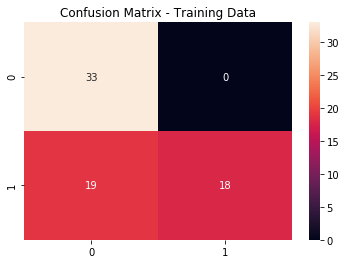

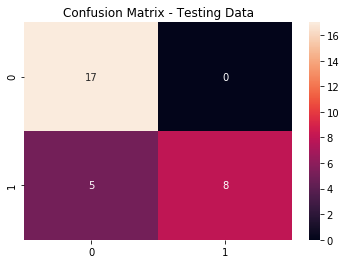

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Testing Misclassified samples : 1
Testing Accuracy: 0.9666666666666667
Training Misclassified samples : 2
Training Accuracy: 0.9714285714285714



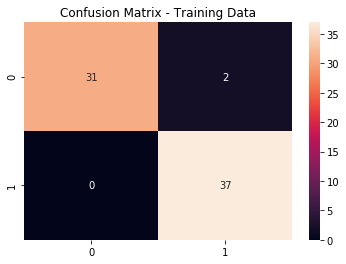

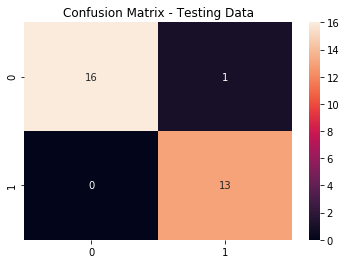

[0.6714285714285714, 0.7285714285714285, 0.9714285714285714]
[0.7666666666666667, 0.8333333333333334, 0.9666666666666667]


In [6]:
train_errors = []
test_errors = []
for k in kernel:
    clf.set_params(kernel=k)
    clf.fit(X_train, Y_train)
    print(clf)
    Y_test_pred = clf.predict(X_test)
    Y_train_pred = clf.predict(X_train)
    count_misclassified = (Y_test != Y_test_pred).sum()
    print('Testing Misclassified samples : {}'.format(count_misclassified))
    print('Testing Accuracy:', metrics.accuracy_score(Y_test, Y_test_pred))
    count_misclassified = (Y_train != Y_train_pred).sum()
    print('Training Misclassified samples : {}'.format(count_misclassified))
    print('Training Accuracy:', metrics.accuracy_score(Y_train, Y_train_pred))
    print()
    
    #Confusion Matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title("Confusion Matrix - Training Data")
    cm = metrics.confusion_matrix(Y_train, Y_train_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show(ax)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title("Confusion Matrix - Testing Data")
    cm = metrics.confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show(ax)
    
    train_errors.append(clf.score(X_train, Y_train))
    test_errors.append(clf.score(X_test, Y_test))
    
print(train_errors)
print(test_errors)

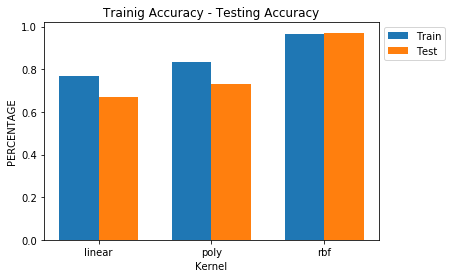

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(len(kernel))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, test_errors, width, label='Train')
rects2 = ax.bar(x + width/2, train_errors, width, label='Test')
ax.set_ylabel('PERCENTAGE')
ax.set_xlabel('Kernel')
ax.set_title('Trainig Accuracy - Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(kernel)
ax.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.show()